In [1]:
import pandas as pd
import numpy as np
df=messages = pd.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.shape

(5572, 2)

In [3]:
X=list(df['message'])

In [4]:
print(X)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [5]:
#y=list(df['label'])

In [6]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [7]:
print(y)

[0 0 1 ... 0 0 0]


In [8]:
#y=pd.get_dummies(y,drop_first=True)

In [9]:
# train - test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
print(X_train)

["No I'm good for the movie, is it ok if I leave in an hourish?", 'If you were/are free i can give. Otherwise nalla adi entey nattil kittum', 'Have you emigrated or something? Ok maybe 5.30 was a bit hopeful...', 'I just got home babe, are you still awake ?', 'Kay... Since we are out already ', "Me i'm not workin. Once i get job...", 'What he said is not the matter. My mind saying some other matter is there.', 'Oh yeah! And my diet just flew out the window', 'sorry, no, have got few things to do. may be in pub later.', 'Ill call you evening ill some ideas.', 'Dear i have reache room', 'Got it! It looks scrumptious... daddy wants to eat you all night long!', 'Badrith is only for chennai:)i will surely pick for us:)no competition for him.', 'In da car park ', 'Am okay. Will soon be over. All the best', "Yar else i'll thk of all sorts of funny things.", "Yup. Izzit still raining heavily cos i'm in e mrt i can't c outside.", 'I am on the way to ur home', "That's ok. I popped in to ask bout

Reference : https://huggingface.co/docs/transformers/training

In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 27.3 MB/s 
     |████████████████████████████████| 6.6 MB 56.2 MB/s 
     |████████████████████████████████| 120 kB 72.3 MB/s 


STEPS

1.Call the pre trained model (DistilBERT)

2.Call the tokenizer (for specific oretrained model there will be a specific tokenizer - DistilBERT)
     
Tokenizer converts sentences in to numerical value. Here by default length =512

In [12]:
from transformers import DistilBertTokenizerFast                     ## calling the pre trained model DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')  ## calling tokenizer

In [13]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)      # Padding - for making all sentence similar size
test_encodings = tokenizer(X_test, truncation=True, padding=True)        # Truncation -for removing white space

In [14]:
print(test_encodings)

{'input_ids': [[101, 4040, 2075, 5796, 2290, 1024, 19181, 1057, 6336, 1040, 6887, 2638, 1010, 1057, 2360, 1000, 7592, 1000, 2079, 1057, 14161, 2860, 1059, 2102, 2003, 1040, 2613, 3574, 1997, 7592, 1029, 1029, 1012, 1012, 1012, 2009, 1005, 1055, 1040, 2171, 1997, 1037, 2611, 1012, 1012, 999, 1012, 1012, 1012, 2748, 1012, 1012, 1998, 1057, 14161, 2860, 2040, 2003, 23755, 2611, 1029, 1029, 1000, 5545, 7592, 1000, 2016, 2003, 1040, 2611, 19699, 4859, 1042, 24665, 4430, 18552, 3363, 2040, 1999, 16022, 3064, 10093, 9864, 1012, 1012, 1012, 1012, 1012, 1012, 1012, 7191, 1024, 2028, 2064, 1018, 18150, 1040, 2171, 1997, 1037, 2711, 1010, 18411, 2025, 2010, 2611, 19699, 4859, 1012, 1012, 1012, 1043, 1051, 1051, 1040, 1050, 1045, 1043, 1044, 1056, 1012, 1012, 1012, 1030, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [15]:
# convert these encodings into data set objects (tensors)

import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [16]:
print(train_dataset)

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(238,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(238,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.uint8, name=None))>


In [19]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

# use SequenceClassification for sentiment analysis
# TFTrainer, TFTrainingArguments are responsible for training the model


training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps=10
)

In [20]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(                        # TFTrainer to do the prediction
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_transform', 'activation_13', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'classifier', 'dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use i

In [21]:
trainer.evaluate(test_dataset)  ## eval lose

{'eval_loss': 0.015575012138911656}

In [35]:
trainer.predict(test_dataset)[0]     # to take label_ids by indexing [1]

array([[ 2.8634832, -3.4571166],
       [-3.0067945,  3.0922556],
       [ 3.103961 , -3.6717067],
       ...,
       [ 2.2811296, -2.8002   ],
       [-3.0112376,  3.0975347],
       [ 2.3100555, -2.8938239]], dtype=float32)

In [37]:
trainer.predict(test_dataset)[0].shape

(1115, 2)

In [38]:
# prediction

output=trainer.predict(test_dataset)[0]  # taking label_ids [1]
output = np.argmax(output, axis = - 1)

In [49]:
print(output)

[0 1 0 ... 0 1 0]


In [50]:
print(y_test)

[0 1 0 ... 0 1 0]


In [39]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,output)
print(cm)

[[955   0]
 [  4 156]]


In [40]:
from sklearn.metrics import accuracy_score
prediction_accuracy = accuracy_score(y_test,output)
print(prediction_accuracy)

0.9964125560538116


In [41]:
## save model

trainer.save_model('senti_model')

# "tf_model.h5" file file will be created and that can downloaded and used wherever we want

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [43]:
confusion_m=confusion_matrix(y_test,output)

0.9964125560538116


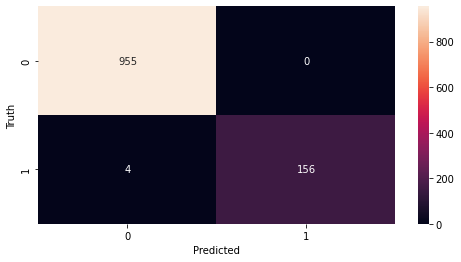

In [48]:
import seaborn as sn
plt.figure(figsize = (8,4))
sn.heatmap(confusion_m, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(prediction_accuracy)